In [9]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle


from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *
from pygenstability.pygenstability import _evaluate_NVI

In [10]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds

In [11]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [12]:
#plt.rcParams.update({'font.size': 20})

# MSF and PH on full multiscale SBM network


In [13]:
n = 270
m = 3473
seed = 20160 

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

A = nx.adjacency_matrix(G).toarray()


In [14]:
# Set MS parameters
n_time = 200
min_time = -1.5
max_time = 0.5

In [15]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 200/200 [01:19<00:00,  2.51it/s]


Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 566.39it/s] 


Computing persistence ... 


[-1.24874372]


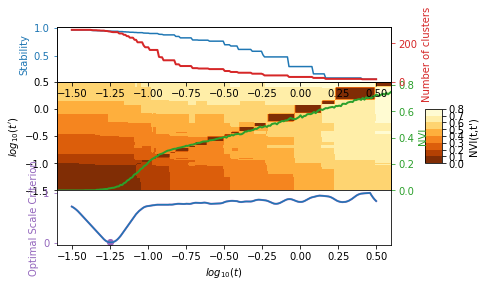

In [16]:
# select optimal scales
identify_optimal_scales(msf.ms_results,criterion_threshold=0.2,window_size=10)
selected_scales = msf.log_times[msf.ms_results['selected_partitions']]
print(selected_scales)
plotting.plot_scan(msf.ms_results)
#plt.savefig(root_fig +'MS_Scan.pdf',bbox_inches='tight')

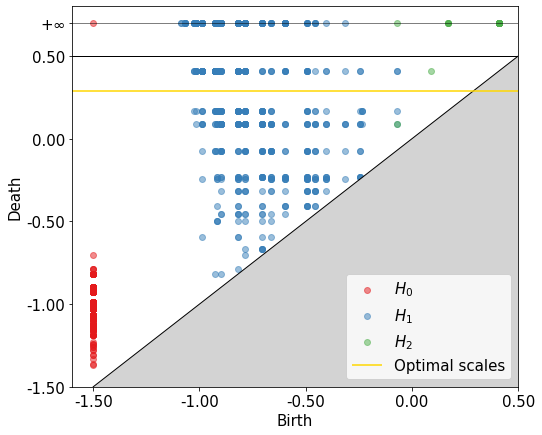

In [17]:
# Get optimal scales
msf.select_scales()
# Plot persistence diagram with optimal scales
ax = msf.plot_persistence_diagram()
#plt.savefig(root_fig +'PD_SBM.pdf',bbox_inches='tight')

# Bootstrapping MSF

In [18]:
n_nodes = 270
seed = 0

In [19]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 150


In [20]:
# define array of nodes
nodes = np.arange(n_nodes)

# initialise random number generator
rng = np.random.RandomState(seed)

# store persistences for different samples
persistences = []

for _ in range(B):

    # sample nodes
    nodes_sample = rng.choice(nodes,n_sample)
    nodes_sample.sort()

    # obtain all community assignments for sampled nodes
    community_ids_sampled = []
    for partition in msf.community_ids:
        community_ids_sampled.append(partition[nodes_sample])

    # initialise new MSF object for sample
    msf_sample = MSF()
    msf_sample.community_ids = community_ids_sampled
    msf_sample.log_times = msf.log_times

    # compute PD for sample
    msf_sample.build_filtration()
    msf_sample.compute_persistence()

    # add persistence of different dimensions to list
    persistences.append(
        [msf_sample.filtration.persistence_intervals_in_dimension(dim) for dim in range(4)]
    )


    

Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2010.68it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1280.26it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2042.07it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1909.10it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1553.81it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1127.78it/s]

Computing persistence ... 


Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1788.40it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1863.14it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2036.33it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2220.76it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2045.77it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2547.92it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 2325.78it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1509.92it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1170.30it/s]

Computing persistence ... 


Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1124.70it/s]

Computing persistence ... 


Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1117.08it/s]

Computing persistence ... 


Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1638.58it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1790.39it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1876.85it/s]

Computing persistence ... 


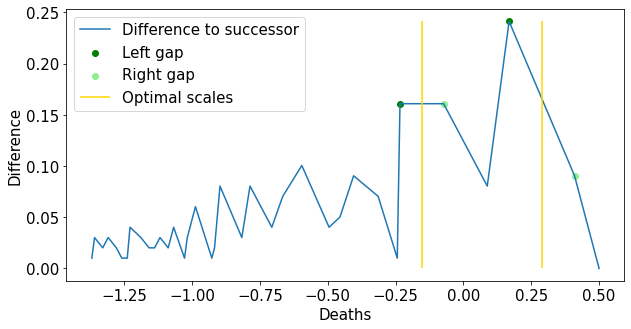

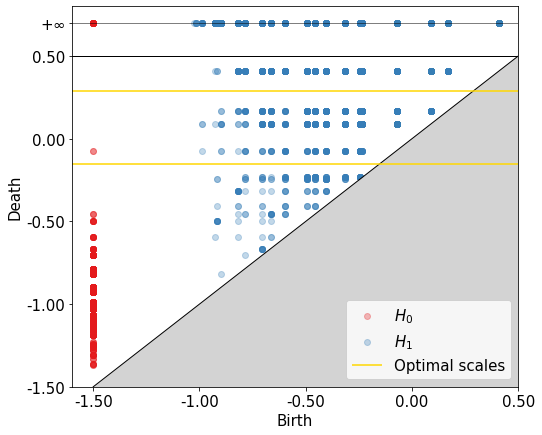

In [21]:
# obtain optimal scales via gaps in PH
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences, msf.log_times, threshold_abs=0.1,min_gap_width=0.105,with_plot=True)

# plot optimal scales in PD
fig, ax = plot_pds(persistences,msf.log_times,optimal_scales_ph,alpha=0.3)
plt.savefig(root_fig +'ER_PD_Bootstrap.pdf', dpi=fig.dpi,bbox_inches='tight')